Dataset loaded successfully!
Dataset shape: (17379, 17)
Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

--- Summary Statistic

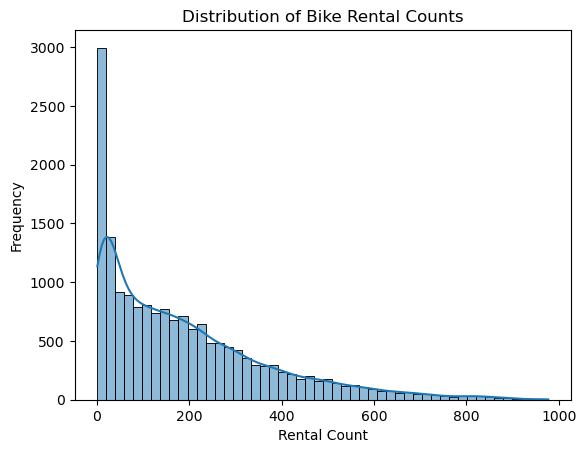

 Data after encoding: (17379, 59)
Features shape: (17379, 55)
Target shape: (17379,)
Train size: (13903, 55) Test size: (3476, 55)
MILESTONE 1 COMPLETED!!!!!!!!!!!!!!!!!!


In [1]:
# RideWise - Milestone 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = r"C:\Users\chait\OneDrive\Desktop\RideWise\hour.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

data = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
display(data.head())
# Step 3: Dataset Exploration

print("\n--- Dataset Info ---")
print(data.info())

print("\n--- Summary Statistics ---")
print(data.describe())

print("\n--- Missing Values ---")
print(data.isnull().sum())

# Distribution of target variable
sns.histplot(data['cnt'], bins=50, kde=True)
plt.title("Distribution of Bike Rental Counts")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()
# Step 4: Data Preprocessing & Feature Engineering

data['dteday'] = pd.to_datetime(data['dteday'], errors='coerce')
data['weekday'] = data['dteday'].dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
categorical_cols = [col for col in ['season','weathersit','mnth','hr','weekday'] if col in data.columns]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print(" Data after encoding:", data.shape)
# Step 5: Feature Selection

drop_cols = [col for col in ['cnt','casual','registered','dteday'] if col in data.columns]
X = data.drop(drop_cols, axis=1)
y = data['cnt']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Step 6: Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("MILESTONE 1 COMPLETED!!!!!!!!!!!!!!!!!!")

In [2]:
# RideWise - Milestone 2

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Week 3: Preliminary Model Training
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Decision Tree 
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Preliminary models trained.")

# Week 4: Predictions and Fine-tuning

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")
    return mae, rmse, r2

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")

rf_tuned = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("\n Fine-tuned Random Forest Results:")
evaluate(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")
print("MILESTONE 2 COMPLETED!!!!!!!!!!!!!!!!!!")

Preliminary models trained.

 Linear Regression Performance
MAE:  74.09
RMSE: 100.44
R²:   0.68

 Decision Tree Performance
MAE:  44.58
RMSE: 74.15
R²:   0.83

 Random Forest Performance
MAE:  30.84
RMSE: 48.68
R²:   0.93

 Fine-tuned Random Forest Results:

 Random Forest (Tuned) Performance
MAE:  44.46
RMSE: 64.15
R²:   0.87
MILESTONE 2 COMPLETED!!!!!!!!!!!!!!!!!!


In [3]:
# -------------------------------
# Milestone 3 - Advanced Models & Fine-Tuning
# -------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Function to evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# -------------------------------
# 1. Random Forest with GridSearchCV
# -------------------------------

param_grid = {
    'n_estimators': [200],
    'max_depth': [15, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\n Best parameters for Random Forest:", grid.best_params_)
evaluate(y_test, best_rf.predict(X_test), "Random Forest (GridSearchCV)")

# -------------------------------
# 2. Gradient Boosting
# -------------------------------
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

gb.fit(X_train, y_train)
evaluate(y_test, gb.predict(X_test), "Gradient Boosting")

# -------------------------------
# 3. XGBoost
# -------------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
evaluate(y_test, xgb.predict(X_test), "XGBoost")

print("MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!")


import joblib

# Save the best Random Forest (from GridSearchCV) for deployment
joblib.dump(best_rf, "ridewise_best_model.pkl")
print(" Best model saved as ridewise_best_model.pkl")




Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

 Random Forest (GridSearchCV) Performance
MAE: 39.44, RMSE: 56.66, R²: 0.90

 Gradient Boosting Performance
MAE: 33.00, RMSE: 50.06, R²: 0.92

 XGBoost Performance
MAE: 27.45, RMSE: 43.79, R²: 0.94
MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!
 Best model saved as ridewise_best_model.pkl


In [21]:
# -------------------------------
# Milestone 3 - Advanced Models & Full Pipeline
# -------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# -------------------------------
# 1. Train-Test Split
# -------------------------------
# Assume X, y from Milestone 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. Preprocessing Pipeline
# -------------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['uint8']).columns.tolist()  # one-hot encoded columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)  # already encoded
    ]
)

# -------------------------------
# 3. Full Pipeline with Random Forest
# -------------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ))
])

# -------------------------------
# 4. Train the Pipeline
# -------------------------------
rf_pipeline.fit(X_train, y_train)

# -------------------------------
# 5. Evaluate Function
# -------------------------------
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# Evaluate Random Forest pipeline
y_pred_rf = rf_pipeline.predict(X_test)
evaluate(y_test, y_pred_rf, "Random Forest Pipeline")

# -------------------------------
# 6. Optional: GridSearch for Random Forest (Advanced)
# -------------------------------
param_grid = {
    'regressor__n_estimators': [200, 300],
    'regressor__max_depth': [15, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_pipeline = grid.best_estimator_

print("\n Best parameters for pipeline:", grid.best_params_)

y_pred_best = best_pipeline.predict(X_test)
evaluate(y_test, y_pred_best, "Random Forest (Tuned Pipeline)")

# -------------------------------
# 7. Save the Full Pipeline
# -------------------------------
joblib.dump(best_pipeline, "ridewise_best_model.pkl")
print(" Best pipeline saved as ridewise_best_model.pkl")



 Random Forest Pipeline Performance
MAE: 86.50, RMSE: 123.45, R²: 0.52
Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Best parameters for pipeline: {'regressor__max_depth': 15, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}

 Random Forest (Tuned Pipeline) Performance
MAE: 88.73, RMSE: 124.42, R²: 0.51
 Best pipeline saved as ridewise_best_model.pkl


In [23]:
# -------------------------------
# Milestone 3 - Advanced Models & Fine-Tuning
# -------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Function to evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} Performance")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mae, rmse, r2

# -------------------------------
# 1. Random Forest with GridSearchCV
# -------------------------------

param_grid = {
    'n_estimators': [200],
    'max_depth': [15, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\n Best parameters for Random Forest:", grid.best_params_)
evaluate(y_test, best_rf.predict(X_test), "Random Forest (GridSearchCV)")

# -------------------------------
# 2. Gradient Boosting
# -------------------------------
gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

gb.fit(X_train, y_train)
evaluate(y_test, gb.predict(X_test), "Gradient Boosting")

# -------------------------------
# 3. XGBoost
# -------------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
evaluate(y_test, xgb.predict(X_test), "XGBoost")

print("MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!")




from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib

categorical_features = ['hr', 'weekday', 'mnth', 'season', 'weathersit']
numeric_features = ['temperature', 'humidity', 'windspeed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_model)])
rf_pipeline.fit(X_train, y_train)

joblib.dump(rf_pipeline, "ridewise_best_model.pkl")
print("✅ Full pipeline saved as ridewise_best_model.pkl")


Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

 Random Forest (GridSearchCV) Performance
MAE: 39.44, RMSE: 56.66, R²: 0.90

 Gradient Boosting Performance
MAE: 33.00, RMSE: 50.06, R²: 0.92

 XGBoost Performance
MAE: 27.45, RMSE: 43.79, R²: 0.94
MILESTONE 3 COMPLETED!!!!!!!!!!!!!!!!!!


ValueError: A given column is not a column of the dataframe

In [4]:
# After training and testing your models
del X_train, X_test, y_train, y_test, gb, xgb, best_rf
import gc
gc.collect()


5601

In [5]:
# Clear memory before loading only the saved pipeline
del X_train, X_test, y_train, y_test, gb, xgb, best_rf
import gc
gc.collect()

# Now load your saved pipeline
import joblib
model = joblib.load("ridewise_best_model.pkl")


NameError: name 'X_train' is not defined

In [6]:
import gc
gc.collect()



564